<a href="https://colab.research.google.com/github/dikiwahyudi11/Case-Study-2-DMDBI/blob/main/Case_Study_2_DMDBI_Kelompok_A_Fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 2 Data Mining dan Business Intellegence**

## **Aplikasi Model Klasifikasi**

## **Anggota Kelompok A DMDBI (B)**
| No. | Nama| NPM| Deskripsi| Kontribusi|
|:---:|-----|:---:|-----|-----|
|1.|Aristriana Muhamad|2106709043|Membentuk model klasifikasi|100%|
|2.|Diki Wahyudi|2106709131|Membentuk model klasifikasi|100%|
|3.|Kirono Dwi Saputro|2106656365|Melakukan preprocessing|100%|
|4.|Myra Azzahra Putri Syah Indra|2106726844|Melakukan EDA|100%|
|5.|Naufal Hafidz|1906377731|Melakukan EDA|100%|
|6.|Zahrah Aulia Putri|2106724896|Membuat laporan|100%|

## Domain Knowledge & Data Understanding

- Data di bawah ini adalah data *hoax* dari https://www.mafindo.or.id/ yang didapatkan secara **legal** dengan meminta izin kepada pimpinan perusahaan Mafindo.
- Label "0" menyatakan **bukan hoax** dan "1" menyatakan **post hoax**.

## Tugas Anda

- Lakukan preprocessing pada variabel "teks" di data.
- Lalukan EDA pada data *hoax* tersebut.
- Buat **Model Klasifikasi Hoax** terbaik dengan **parameter optimal** (dan **cross validated**)
- Buatlah sebuah **laporan Analisis Data** tersebut (di Jupyter Notebook) seolah-olah Anda adalah seorang Data Scientist Kominfo dan ditugaskan oleh menteri-nya untuk menjelaskan tentang data *hoax* yang ada.
- Jangan lupa jika Anda akan melakukan *attach* gambar (misalnya screenshot dari Voyant Tools), maka **jangan _load local file_**, tetapi upload terlebih dahulu ke GitHub (kalian sendiri) lalu *load* di Jupyter Notebook.
- Cara *load image* dengan Markdown saat gambar ada di GitHub: https://stackoverflow.com/a/63270255/2844866
- Ingat jangan *load local image(s)* karena dosen tidak akan bisa membukanya.
- Teknik preprocessing, slicing data, variabel selection & engineering, pemilihan visualisasi, interpretasi, performa model klasifikasi, dan penyajian report adalah hal-hal yang akan dinilai dari kasus ini.
- Code harus bisa di-"Run-All" di **Google Colaboratory** "Error Free" dan **TIDAK PERLU REQUEST ACCESS** (bisa dibuka oleh umum/publik).

## Import Data

In [1]:
# Loading data
import warnings; warnings.simplefilter('ignore')
import pandas as pd

fData = 'data/Data-Hoax-Mafindo.csv'
try:
    data = pd.read_csv(fData)
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv
    data = pd.read_csv(fData)

In [2]:
data.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [3]:
# Ukuran data
data.shape

(4701, 6)

## Import Library

In [4]:
# Jalankan Cell ini "HANYA" jika Anda menggunakan Google Colaboratory
# Jika di jalankan di komputer local, silahkan lihat NLPTM-02 untuk instalasinya
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab; IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/taudataNlpTm.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install spacy python-crfsuite unidecode textblob sastrawi
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    !pip install spacy unidecode textblob sastrawi pyLDAvis
    !pip install --upgrade python-crfsuite gensim
    !pip install sklearn-pycrfsuite
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download xx_sent_ud_sm
    !python -m spacy download en_core_web_sm

    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all Python module versions agree with Colab environment and all data/datasets downloaded")

--2023-11-24 14:19:28--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14001 (14K) [text/plain]
Saving to: ‘taudataNlpTm.py.2’

taudataNlpTm.py.2   100%[===================>]  13.67K  --.-KB/s    in 0.001s  

2023-11-24 14:19:28 (19.0 MB/s) - ‘taudataNlpTm.py.2’ saved [14001/14001]

mkdir: cannot create directory ‘data’: File exists
--2023-11-24 14:19:28--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HT

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [5]:
# Importing modules untuk notebook ini
!pip install "pandas<2.0.0"
import taudataNlpTm as tau, itertools, re, pickle, pyLDAvis, spacy, urllib.request
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from tqdm import tqdm
from nltk.tag import CRFTagger
from nltk.corpus import stopwords
from collections import Counter
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()
sns.set(style = "ticks", color_codes = True)
random_state = 99
'Done'

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


'Done'

## Preprocessing


In [6]:
# Tipe data
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID                   int64
label                int64
tanggal             object
judul               object
narasi              object
nama file gambar    object
dtype: object

- `D1`: document dari variabel `judul`
- `D2`: document dari variabel `narasi`

In [7]:
# Mengubah data ke bentuk yang biasa kita gunakan
D1 = [doc for doc in data["judul"]]
Y1 = data['label']
"Done"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Done'

In [8]:
# Mengubah data ke bentuk yang biasa kita gunakan
D2 = [doc for doc in data["narasi"]]
Y2 = data['label']
"Done"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Done'

In [9]:
D1[0], Y1[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('Pemakaian Masker Menyebabkan Penyakit Legionnaires', 1)

In [10]:
D2[0], Y2[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('A caller to a radio talk show recently shared that his wife was hospitalized n told she had COVID n only a couple of days left to live . A doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . Turns out it WAS legionnaires disease from the moisture n bacteria in her mask . She was given antibiotics n within two days was better . WHAT IF these ‘spikes’ in COVID are really something else due to ‘mask induced infections’ .??🤔🤔🤔',
 1)

In [11]:
# Preprocessing
def prepro(D, lang = "id"):
  stop_add = ['ini', 'yg', 'yang', 'dlm', 'adalah', 'yth', 'tapi', 'di', 'nih', 'dari', 'tp', 'untuk',
            'kami', 'dan', 'sih', 'sy', 'dn', 'mnjdi', 'mrk', 'krn', 'lgi', 'nya', 'itu', 'kok', 'tidak',
            'tak', 'tdk', 'bisa', 'byk', 'lbh', 'ke', 'kita', 'jika', 'apa', 'tanpa', 'sdh', 'ku', 'pd',
            'ttg', 'karna', 'biar', 'oleh', 'dalam', 'juga', 'jadi', 'saya', 'dengan', 'dgn', 'akan',
            'atau', 'yng', 'nggak', 'karena', 'gk', 'tlh', 'lebih', 'serta', 'benar', 'jpg', 'png', 'hanya',
            'udah', 'ada', 'bkn', 'bukan', '&', 'terjadi', 'lain', 'pak', 'hanya', 'dia', 'merupakan',
            'saja', 'jaga', 'masih', 'dlu', 'tetapi', 'aja', 'koq', 'kan', 'jg', 'telah', 'tau', 'tahu',
            'ngak', 'perlu', 'lagi', 'spt', 'seperti', 'udh', 'harus', 'para', 'kecuali', 'terjadi']
  if lang=="id":
    stops, lemmatizer = tau.LoadStopWords(lang = 'id')
    for i in stop_add:
      stops.add(i)
    for i, d in tqdm(enumerate(D)):
      D[i] = tau.cleanText(d, lemma = lemmatizer, stops = stops, symbols_remove = True, min_charLen = 2)
  elif lang=="en":
    stops, lemmatizer = tau.LoadStopWords(lang = 'en')
    for i, d in tqdm(enumerate(D)):
      D[i] = tau.cleanText(d, lemma = lemmatizer, stops = stops, symbols_remove = True, min_charLen = 2)
  return(D)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Karena bahasa dalam document campuran bahasa Inggris dan bahasa Indonesia, maka *preprocessing* akan dilakukan 2 kali untuk masing-masing `D1` dan `D2` agar *stop words* dari kedua bahasa dapat ter-*filter* dengan maksimal.

In [12]:
D1 = prepro(D1, lang = "id")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
4701it [13:09,  5.96it/s]


In [13]:
D1 = prepro(D1, lang = "en")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
4701it [00:02, 1569.70it/s]


In [14]:
D2 = prepro(D2, lang = "id")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
4701it [19:39,  3.98it/s]


In [15]:
D2 = prepro(D2, lang = "en")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
4701it [00:03, 1321.74it/s]


In [16]:
# Bagian ini dilakukan untuk meyakinkan stop words yang telah ditambahkan dapat ter-filter
D1 = prepro(D1, lang = "id")
D2 = prepro(D2, lang = "id")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
4701it [00:01, 3927.65it/s]
4701it [00:01, 2397.65it/s]


Selanjutnya, format variabel `tanggal` akan diubah menjadi `datetime`.

In [17]:
data.loc[0, "tanggal"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'17-Aug-20'

In [18]:
import datetime
date = data.loc[0, "tanggal"]
dt = datetime.datetime.strptime(date, '%d-%b-%y')
if dt.year>2000:
    dt = dt.replace(year = dt.year)
print(dt.strftime("%d-%m-%Y"))

17-08-2020


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Agar semua bulan dapat terdeteksi, akan dilakukan normalisasi pada nama bulan.

In [19]:
# Replace substring
data["tanggal"] = data["tanggal"].replace({'Okt': 'Oct', 'Agu': 'Aug'}, regex = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
data["tanggal"] = pd.to_datetime(data["tanggal"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
data["tanggal"][0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0   2020-08-17
1   2020-07-17
2   2020-07-13
3   2020-07-08
4   2020-06-24
5   2020-06-17
6   2020-05-05
7   2020-03-24
8   2020-01-09
9   2019-12-24
Name: tanggal, dtype: datetime64[ns]

Berikut ini tampilan data teks sebelum dan sesudah di-*preprocessing*.

In [22]:
df = data.copy()
df["judul_preprocessed"] =  D1
df["narasi_preprocessed"] = D2
df.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,label,tanggal,judul,narasi,nama file gambar,judul_preprocessed,narasi_preprocessed
0,71,1,2020-08-17,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg,pakai masker sakit legionnaires,caller radio talk shared wife hospitalized tol...
1,461,1,2020-07-17,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png,instruksi gubernur jateng tilang masker muka e...,anggota grup sesuai instruksi gubernur jawa ha...
2,495,1,2020-07-13,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png,foto jim rohn jokowi presiden sejarah bangsa i...,jokowi presiden sejarah bangsa indonesia jim r...
3,550,1,2020-07-08,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png,politik nyata jokowi hasil pulang triliun uang...,maaf politik nyata jokowi hasil pulang triliun...
4,681,1,2020-06-24,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg,foto kadrun kalo lihat foto panas dingin,kadrun kalo lihat foto panas dingin
5,736,1,2020-06-17,event promo smartphone JNE 2020 spesial di bul...,"selamat siang teman teman fb ku semuanya🤩,cuma...",736.png,event promo smartphone jne spesial juni,selamat siang teman teman fb cuman informasi r...
6,1161,1,2020-05-05,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...,1161.png,kuasa negri,lihat kuasa negri
7,1597,1,2020-03-24,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...,1597.png,foto presiden italia menang lahan kubur korban...,italia fasilitas awat sehat canggih gagal kend...
8,2098,1,2020-01-09,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",Polisi goblok. Bukanya cpet” d tolongin malah ...,2098.jpg,kapolres timor utara nusa tenggara timur klari...,polisi goblok buka cpet tolongin liat
9,2226,1,2019-12-24,Video Polisi china telah menganiaya wanita uig...,Polisi china telah menganiaya wanita uighur le...,2226.png,video polisi china aniaya wanita uighur leher ...,polisi china aniaya wanita uighur leher cekik ...


In [23]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID                              int64
label                           int64
tanggal                datetime64[ns]
judul                          object
narasi                         object
nama file gambar               object
judul_preprocessed             object
narasi_preprocessed            object
dtype: object

Hasil data yang telah di-*preprocessing* akan di-*save* dalam format CSV.

In [24]:
# df.to_csv('data_preprocessed.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# df = pd.read_csv('data_preprocessed.csv')
# df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Mengubah data ke bentuk yang biasa kita gunakan
D1 = [doc for doc in df["judul_preprocessed"]]
Y1 = df['label']
"Done"
# Mengubah data ke bentuk yang biasa kita gunakan
D2 = [doc for doc in df["narasi_preprocessed"]]
Y2 = df['label']
"Done"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Done'

In [27]:
D1[0:5], D2[0:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(['pakai masker sakit legionnaires',
  'instruksi gubernur jateng tilang masker muka e-tilang apps pikobar',
  'foto jim rohn jokowi presiden sejarah bangsa indonesia',
  'politik nyata jokowi hasil pulang triliun uang negara swiss',
  'foto kadrun kalo lihat foto panas dingin'],
 ['caller radio talk shared wife hospitalized told covid couple days left live doctor friend suggested tested legionnaires disease wore mask day day long turns legionnaires disease moisture bacteria mask antibiotics days better spikes covid mask induced infections',
  'anggota grup sesuai instruksi gubernur jawa hasil rapat tim gugus tugas covid jateng sbb',
  'jokowi presiden sejarah bangsa indonesia jim rohn motivator dunia',
  'maaf politik nyata jokowi hasil pulang triliun uang negara swiss triliun bawa indonesia ruu treaty mutual legal assistance criminal matters republic indonesia swiss confederation mla ri-swiss resmi sah dpr ri tanggal juli proses konstitusi tarik dana swiss selesai juang hadap korupto

In [28]:
df['label'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    3850
0     851
Name: label, dtype: int64

## EDA

Akan dibuat visualisasi dari data teks yang sudah di-*preprocessing* dengan menggunakan Voyant Tools. Didapatkan hasil sebagai berikut.

In [29]:
# df[['label', 'judul_preprocessed']].to_csv("cleaned_title.csv", index = False, encoding = 'utf8', header = False)
# df[['label', 'narasi_preprocessed']].to_csv("cleaned_narasi.csv", index = False, encoding = 'utf8', header = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualisasi Narasi Bukan Hoax
![Visualisasi narasi bukan hoax](https://raw.githubusercontent.com/zahrahaulia21/Kelompok-A---Studi-Kasus-Model-Klasifikasi-Datmin/main/bukan%20hoax%20narasi.jpg)

Pada narasi yang bukan *hoax* beberapa kata yang banyak digunakan adalah Indonesia, hoax, Jokowi, Islam, dan Jakarta.

###Visualisasi Narasi Hoax
![Visualisasi narasi hoax](https://raw.githubusercontent.com/zahrahaulia21/Kelompok-A---Studi-Kasus-Model-Klasifikasi-Datmin/main/hoax%20narasi.jpg)

Pada narasi hoax, beberapa kata yang banyak digunakan adalah Indonesia, Jokowi, virus, corona, covid, Islam dan China.

### Visualisasi Judul Bukan Hoax
![Visualisasi judul bukan hoax](https://raw.githubusercontent.com/zahrahaulia21/Kelompok-A---Studi-Kasus-Model-Klasifikasi-Datmin/main/judul%20bukan%20hoax.png)

Pada judul yang bukan *hoax*, kata yang banyak digunakan di antaranya adalah klarifikasi, bantah, Jokowi, Indonesia, *hoax*, polisi, dan Jakarta.

### Visualisasi Judul Hoax

![Visualisasi judul hoax](https://raw.githubusercontent.com/zahrahaulia21/Kelompok-A---Studi-Kasus-Model-Klasifikasi-Datmin/main/judul%20hoax.jpg)

Pada judul *hoax*, kata yang banyak digunakan di antaranya adalah Jokowi, video, foto, Indonesia, corona, Prabowo, dan China.

### Visualisasi Teks Hoaks Keseluruhan

Jika teks dalam variabel `judul` dan `narasi` digabungkan, maka didapatkan hasil visualisasi teks sebagai berikut.

In [30]:
D = [str(a) + ' ' + str(b) for a, b in zip(D1, D2)]
Y = df["label"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
hoaks = df.copy()
hoaks["teks"] = D
hoaks = hoaks[hoaks["label"]==1]
hoaks.sort_values(by = "tanggal", ascending = True, inplace = True)
hoaks.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,label,tanggal,judul,narasi,nama file gambar,judul_preprocessed,narasi_preprocessed,teks
320,73720,1,2015-07-31,Ahok izinkan Natalan di Monas - tapi larang pe...,MARI KITA TOLAK. 25 desember acara pastur di m...,73720.jpg,ahok izin natal monas larang aji monas,mari tolak desember acara pastur monas majlis ...,ahok izin natal monas larang aji monas mari to...
4436,434161,1,2015-09-08,Mata Uang Rupiah Terpuruk,"Hari ini, Rabu (23/09/2015), nilai tukar rupia...",434161.jpg,mata uang rupiah puruk,rabu nilai tukar rupiah puruk rp dolar,mata uang rupiah puruk rabu nilai tukar rupiah...
2133,499700,1,2015-09-08,Jokowi dituduh memasukkan ribuan tenaga kerja ...,Pak Jokowi itu menjadi walikota periode pertam...,499700.jpg,jokowi tuduh masuk ribu tenaga kerja asing ind...,jokowi walikota periode solo salah,jokowi tuduh masuk ribu tenaga kerja asing ind...
1653,376817,1,2015-09-12,"Jokowi dituduh bodoh, salah cara dalam bersala...","hehe, selalu bisa tersenyum melihat tingkah la...",376817.jpg,jokowi tuduh bodoh salah salam raja saudi,hehe senyum tingkah laku jokowi terimakasih hi...,jokowi tuduh bodoh salah salam raja saudi hehe...
3014,712690,1,2015-09-15,Foto Raja Salman Mengangkat Tandu Jenazah Korb...,Raja Salman dari arab saudi membawa orang-oran...,712690.png,foto raja salman angkat tandu jenazah korban c...,raja salman arab saudi bawa orang tinggal cran...,foto raja salman angkat tandu jenazah korban c...
24,8176,1,2015-09-15,Larangan anti-miras di Minimarket ditiadakan o...,"Pada 16 April lalu, Menteri Perdagangan Rachma...",8176.jpg,larang anti-miras minimarket tiada rezim jokow...,april menteri dagang rachmat gobel laku bijak ...,larang anti-miras minimarket tiada rezim jokow...
2898,688112,1,2015-09-18,"Dituduh PKI Bangkit di Pamekasan, Jokowi Dicac...",PAS KAMPANYE ada warning dugaan PKI bangkit di...,688112.jpg,tuduh pki bangkit pamekasan jokowi caci maki,kampanye warning duga pki bangkit jokowi kubu ...,tuduh pki bangkit pamekasan jokowi caci maki k...
2043,475119,1,2015-09-21,Ahok Melarang Kurban,"Jadi Hok, mendingan lo tidur aje, ngga usah ng...",475119.jpg,ahok larang kurban,hok mending tidur aje ngga ngeluarin instuksi-...,ahok larang kurban hok mending tidur aje ngga ...
771,180206,1,2015-09-22,Jokowi Hendak Minta Maaf kepada PKI/Keluarga PKI,“Jokowi Mau Minta Maaf pada eks PKI. Apakah In...,180206.png,jokowi maaf pki keluarga pki,jokowi maaf eks pki test water,jokowi maaf pki keluarga pki jokowi maaf eks p...
597,139237,1,2015-10-03,: Munculnya Bara Api di Yaman,Munculnya Bara Api di Yaman,139237.jpg,muncul bara api yaman,muncul bara api yaman,muncul bara api yaman muncul bara api yaman


In [32]:
# hoaks["teks"].to_csv("hoaks.txt", index = False, encoding = 'utf8', header = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


![Visualisasi teks hoax](https://github.com/dikiwahyudi11/Case-Study-2-DMDBI/blob/main/teks_hoaks.png?raw=1)

Terlihat bahwa kata-kata yang terkait dengan pemerintahan/politik seperti presiden, Jokowi, dan Prabowo banyak mengandung informasi hoaks-nya.

![Visualisasi trend teks hoax](https://github.com/dikiwahyudi11/Case-Study-2-DMDBI/blob/main/tren_hoaks.png?raw=1)

Terlihat bahwa kata covid mengalami kenaikian jumlah informasi yang mengandung hoaks pada periode tertentu. Hal tersebut diduga karena efek pandemi covid yang terjadi pada tahun 2019 lalu, di mana informasi-informasi yang berkaitan dengan covid dapat menyebar dengan cepat tanpa jaminan kevalidannya.

Berikut ini merupakan kata yang berkaitan dari dokumen yang merupakan hoaks.

![Visualisasi trend teks hoax](https://github.com/dikiwahyudi11/Case-Study-2-DMDBI/blob/main/korelasi_katahoaks.png?raw=1)


## Feature Engineering

Akan dilakukan klasifikasi dokumen dengan menggabungkan data teks dalam variabel `judul` dan `narasi`.

In [33]:
D[0:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pakai masker sakit legionnaires caller radio talk shared wife hospitalized told covid couple days left live doctor friend suggested tested legionnaires disease wore mask day day long turns legionnaires disease moisture bacteria mask antibiotics days better spikes covid mask induced infections',
 'instruksi gubernur jateng tilang masker muka e-tilang apps pikobar anggota grup sesuai instruksi gubernur jawa hasil rapat tim gugus tugas covid jateng sbb',
 'foto jim rohn jokowi presiden sejarah bangsa indonesia jokowi presiden sejarah bangsa indonesia jim rohn motivator dunia',
 'politik nyata jokowi hasil pulang triliun uang negara swiss maaf politik nyata jokowi hasil pulang triliun uang negara swiss triliun bawa indonesia ruu treaty mutual legal assistance criminal matters republic indonesia swiss confederation mla ri-swiss resmi sah dpr ri tanggal juli proses konstitusi tarik dana swiss selesai juang hadap koruptor bersenggama agama terimakasih kadrun nyinyirian uang triliun indonesi

In [34]:
len(D), len(Y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4701, 4701)

In [35]:
# Bentuk VSM-nya
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase = True, stop_words = 'english', smooth_idf = True, sublinear_tf = True,
                                   ngram_range = (1, 2), max_df = 0.90, min_df = 2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
from sklearn.model_selection import train_test_split
seed = 99

x_train, x_test, y_train, y_test = train_test_split(D, Y, test_size = 0.3, random_state = seed)
x_train = tfidf_vectorizer.fit_transform(x_train) # "fit_transform"
x_test = tfidf_vectorizer.transform(x_test) # Perhatikan di sini hanya "transform"

print(x_train.shape, x_test.shape) # Jumlah kolom sama -> ini penting

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3290, 8905) (1411, 8905)


In [37]:
# Jangan lupa langkah penting ini!
def hapusKosong(X,Y):
    Y = Y[X.getnnz(1)>0] # Delete label dokumen yang memiliki row = 0 di tfidf-nya
    X = X[X.getnnz(1)>0] # Remove zero rows
    return X, Y

x_train, y_train = hapusKosong(x_train, y_train)
x_test, y_test = hapusKosong(x_test, y_test)
print(x_train.shape, x_test.shape)

(3289, 8905) (1410, 8905)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Classification

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### SVM

In [39]:
# Support Vector Machines
model = SVC()
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy Score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVC()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.67      0.81       578
           1       0.94      1.00      0.97      2711

    accuracy                           0.94      3289
   macro avg       0.97      0.84      0.89      3289
weighted avg       0.95      0.94      0.94      3289

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.11      0.20       273
           1       0.82      1.00      0.90      1137

    accuracy                           0.83      1410
   macro avg       0.87      0.55      0.55      1410
weighted avg       0.84      0.83      0.77      1410

Accuracy Score
-------------------------------------------------------
0.825531914893617

Confusion matrix
-------------------------------------------------------
[[  30  243]
 [   3 1134]]


### Logistic Regression

In [40]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

LogisticRegression()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.16      0.27       578
           1       0.85      1.00      0.92      2711

    accuracy                           0.85      3289
   macro avg       0.89      0.58      0.59      3289
weighted avg       0.86      0.85      0.80      3289

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.10      0.18       273
           1       0.82      1.00      0.90      1137

    accuracy                           0.82      1410
   macro avg       0.83      0.55      0.54      1410
weighted avg       0.83      0.82      0.76      1410

Accuracy score
-------------------------------------------------------
0.8219858156028369

Confusion matrix
-------------------------------------------------------
[[  27  246]
 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Random Forest

In [41]:
# Random Forest
model = RandomForestClassifier(n_jobs = -2, random_state = 123)
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(n_jobs=-2, random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00      2711

    accuracy                           1.00      3289
   macro avg       1.00      1.00      1.00      3289
weighted avg       1.00      1.00      1.00      3289

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.25      0.38       273
           1       0.84      0.98      0.91      1137

    accuracy                           0.84      1410
   macro avg       0.80      0.62      0.64      1410
weighted avg       0.83      0.84      0.80      1410

Accuracy score
-------------------------------------------------------
0.8397163120567376

Confusion matrix
---------------------------------------

### Neural Network

In [42]:
# Neural Network
model = MLPClassifier()
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MLPClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00      2711

    accuracy                           1.00      3289
   macro avg       1.00      1.00      1.00      3289
weighted avg       1.00      1.00      1.00      3289

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.34      0.42       273
           1       0.85      0.93      0.89      1137

    accuracy                           0.81      1410
   macro avg       0.69      0.63      0.65      1410
weighted avg       0.79      0.81      0.80      1410

Accuracy score
-------------------------------------------------------
0.8127659574468085

Confusion matrix
-------------------------------------------------------
[[  94  179]
 [  85

### $k$-NN

In [43]:
# k-Nearest Neighbors
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNeighborsClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.32      0.45       578
           1       0.87      0.98      0.92      2711

    accuracy                           0.86      3289
   macro avg       0.81      0.65      0.68      3289
weighted avg       0.85      0.86      0.84      3289

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.16      0.25       273
           1       0.83      0.97      0.89      1137

    accuracy                           0.81      1410
   macro avg       0.69      0.57      0.57      1410
weighted avg       0.77      0.81      0.77      1410

Accuracy score
-------------------------------------------------------
0.8113475177304964

Confusion matrix
-------------------------------------------------------
[[  45  228]

### XGBoost

In [44]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 123)
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.59      0.74       578
           1       0.92      1.00      0.96      2711

    a

## Model Evaluation & Optimization

Karena 3 model yang baik (akurasi tinggi pada data test) yaitu Random Forest, XGBoost, dan SVM, maka selanjutnya akan dilakukan *hyperparameter tuning* dengan metode Randomized Search.

In [45]:
from sklearn.model_selection import RandomizedSearchCV, KFold

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# Random Forest
# n_jobs = -1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 5],
    'min_samples_leaf': [1, 2, 4, 5],
    'max_leaf_nodes': [4, 10, 20, 50, None]
}

gs1 = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1), params, n_jobs = -1,
                         cv = KFold(n_splits = 3), scoring = 'accuracy')
gs1.fit(x_train, y_train)

print('Best score:', gs1.best_score_)
print('Best parameters:', gs1.best_params_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `p

Best score: 0.842506493045621
Best parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'criterion': 'gini'}


In [47]:
# XGBoost
# n_jobs = -1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5]
}

gs2 = RandomizedSearchCV(XGBClassifier(n_jobs = -1), params, n_jobs = -1,
                         cv = KFold(n_splits = 3), scoring = 'accuracy', verbose = -1)
gs2.fit(x_train, y_train)

print('Best score:', gs2.best_score_)
print('Best parameters:', gs2.best_params_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `p

Best score: 0.8504123721629661
Best parameters: {'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 0.5, 'booster': 'gbtree'}


In [48]:
params = {'C': [0.1, 1, 10, 100, 1000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
gs3 = RandomizedSearchCV(SVC(probability = True), params, n_jobs = -1,
                         cv = KFold(n_splits = 3), scoring = 'accuracy', verbose = 1)
gs3.fit(x_train, y_train)

print('Best score:', gs3.best_score_)
print('Best parameters:', gs3.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `p

Best score: 0.8245685534758588
Best parameters: {'kernel': 'poly', 'gamma': 1, 'C': 100}


Selanjutnya, akan dilakukan voting dengan mengabungkan ketiga model yang telah dioptimalkan di atas.

In [49]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier
votes = [('rf', gs1.best_estimator_), ('xgb', gs2.best_estimator_), ('svm', gs3.best_estimator_)]
# Soft voting based on weights
votesClass = VotingClassifier(estimators = votes, voting = 'soft', n_jobs = -1)
votesClass_cv = cross_validate(votesClass, x_train, y_train, cv = KFold(3))
votesClass.fit(x_train, y_train)

votesClass_cv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'fit_time': array([11.15347672, 14.05275464, 10.88764811]),
 'score_time': array([0.55071926, 0.54938293, 0.75218749]),
 'test_score': array([0.83409298, 0.84854015, 0.8330292 ])}

In [50]:
from sklearn.ensemble import ExtraTreesClassifier

model = votesClass
# model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(min_samples_split=4,
                                                     n_estimators=200,
                                                     n_jobs=-1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0...
                                            learning_rate=0.1, max_bin=None,
      

Selanjutnya, akan dilakukan *fitting* model Random Forest, XGBoost, dan SVM dengan *hyperparameter* yang telah dioptimalkan.

In [51]:
# Random Forest
model = RandomForestClassifier(n_jobs = -2, random_state = 123, **gs1.best_params_)
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(min_samples_split=4, n_estimators=200, n_jobs=-2,
                       random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       578
           1       1.00      1.00      1.00      2711

    accuracy                           1.00      3289
   macro avg       1.00      1.00      1.00      3289
weighted avg       1.00      1.00      1.00      3289

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.27      0.40       273
           1       0.85      0.98      0.91      1137

    accuracy                           0.84      1410
   macro avg       0.81      0.62      0.65      1410
weighted avg       0.83      0.84      0.81      1410

Accuracy score
-------------------------------------------------------
0.843262411347

In [52]:
model = XGBClassifier(random_state = 123, **gs2.best_params_)
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.37      0.54       578
           1       0.88      1.00      0.94      2711

    

In [53]:
# Support Vector Machines
model = SVC(**gs3.best_params_)
model.fit(x_train, y_train)
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy Score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVC(C=100, gamma=1, kernel='poly')
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00      2711

    accuracy                           1.00      3289
   macro avg       1.00      1.00      1.00      3289
weighted avg       1.00      1.00      1.00      3289

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.01      0.01       273
           1       0.81      1.00      0.89      1137

    accuracy                           0.81      1410
   macro avg       0.74      0.50      0.45      1410
weighted avg       0.78      0.81      0.72      1410

Accuracy Score
-------------------------------------------------------
0.8070921985815603

Confusion matrix
-------------------------------------------------------


Dari hasil di atas, didapatkan bahwa model terbaik yang kami dapatkan untuk meng-klasifikasi-kan apakah suatu dokumen hoaks/tidak yaitu model XGBoost dengan akurasi **84.96%**.

## Topic Modelling

Akan dilakukan *topic modelling* dengan metode LDA Matrix Decomposition untuk mengetahui topik-topik apa saja yang dibahas di dalam dokumen.

In [54]:
# Kita mulai dengan membuat VSM-nya
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()

tf = tf_vectorizer.fit_transform(D)
tf_terms = tf_vectorizer.get_feature_names_out()

tf.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4701, 14118)

In [55]:
tf_terms[0:15]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['aa', 'aac', 'aach', 'aaj', 'aalaamiin', 'aalamiin', 'aamiin',
       'aamiinkan', 'aamiinn', 'aamin', 'aamir', 'aarekkhaan', 'ab',
       'abad', 'abadi'], dtype=object)

In [56]:
# Dilanjutkan dengan membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 4
lda = LDA(n_components = n_topics, learning_method = 'batch', random_state = 0).fit(tf)
lda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=4, random_state=0)

In [57]:
# Melihat topik-topiknya
vsm_topics = lda.transform(tf)
print(vsm_topics.shape)
vsm_topics
# Ukuran kolom = # Topics -> Dimension Reduction

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4701, 4)


array([[0.00623923, 0.00601722, 0.00601298, 0.98173056],
       [0.96646782, 0.01120672, 0.01107653, 0.01124893],
       [0.71561799, 0.25583983, 0.01429942, 0.01424275],
       ...,
       [0.97218918, 0.00924245, 0.00923996, 0.00932841],
       [0.01832552, 0.94432005, 0.01884166, 0.01851277],
       [0.01594497, 0.01626619, 0.01504258, 0.95274626]])

In [58]:
# Diasumsikan 1 dokumen hanya membahas 1 topik dengan nilai skor topik terbesar
doc_topic =  [a.argmax() + 1 for a in tqdm(vsm_topics)] # Topic of documents
doc_topic[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 4701/4701 [00:00<00:00, 531123.35it/s]


[4, 1, 1, 1, 1, 4, 1, 1, 3, 3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 4 artists>

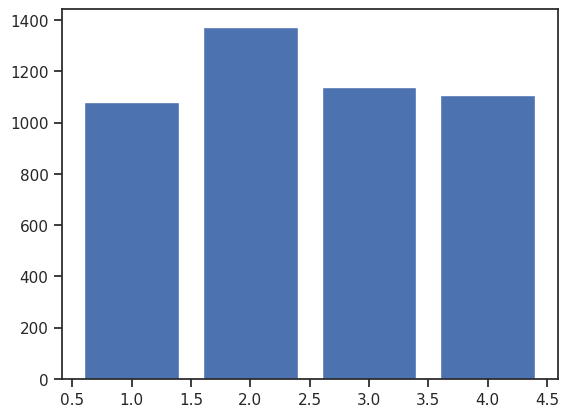

In [59]:
# Mari kita plot
counts = Counter(doc_topic)
plt.bar(counts.keys(), counts.values())

In [60]:
# Mari kita coba maknai masing-masing topik ini
Top_Words = 25
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
tau.print_Topics(lda, tf_terms, n_topics, Top_Words)

Printing top 4 Topics, with top 25 Words:
Topic #1:
virus corona orang china jokowi indonesia tinggal sakit anak jakarta air positif rumah covid pasien cina foto dunia anies obat mati temu jalan manusia rs
Topic #2:
jokowi indonesia presiden prabowo foto dukung pki video ahok jakarta islam suara anak kpu negara perintah pilih dki dunia warga agama rakyat kait sandi masuk
Topic #3:
indonesia tni hoax foto kerja polisi surat akun islam nama kait edar anggota pt polri berita aksi uang info muslim masyarakat mahasiswa laku bank facebook
Topic #4:
orang indonesia video tinggal anak bakar sebar china korban negara makan polisi rumah salah masuk air foto corona hati allah perintah rakyat arab nama pakai


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
# %matplotlib inline
# Mari kita plot, supaya lebih jelas
# Catatan, bergantung dari laptop yang digunakan, image terkadang cukup lama untuk muncul
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda, tf, tf_vectorizer, mds = "mmds")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.110333 -0.095558       1        1  27.836134
0     -0.072883  0.141820       2        1  24.531901
2      0.091389 -0.118663       3        1  24.222830
3      0.091827  0.072401       4        1  23.409134, topic_info=          Term        Freq       Total Category  logprob  loglift
13582    virus  389.000000  389.000000  Default  30.0000  30.0000
2484    corona  409.000000  409.000000  Default  29.0000  29.0000
5544    jokowi  620.000000  620.000000  Default  28.0000  28.0000
9980   prabowo  244.000000  244.000000  Default  27.0000  27.0000
13015      tni  184.000000  184.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
2484    corona   66.980132  409.787931   Topic4  -5.8664  -0.3592
3798      foto   69.611822  508.457184   Topic4  -5.8279  -0.5364
1106     bantu   55.399873  163.497078   Topic4  -6.0562   0.3698
8443      nama   58.949402  244.926601   Topic4  -5.9941   0.0278
5218     islam   55.765457  271.239345   Topic4  -6.0496  -0.1298

[339 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
28         1  0.894296    abdul
28         2  0.033122    abdul
28         4  0.033122    abdul
56         1  0.668996    acara
56         2  0.087737    acara
...      ...       ...      ...
13718      3  0.213056    warga
13718      4  0.204861    warga
13778      1  0.963929  website
13840      1  0.957487  wiranto
13918      2  0.981110    wuhan

[619 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

Berdasarkan hasil di atas, topik yang diduga mewakili dokumen-dokumen dalam data yaitu 1: Politik, 2: Kesehatan, 3: Agama, dan 4: Ketenagakerjaan.


In [62]:
df2 = df.copy()
df2["teks"] = D
df2["topik"] = doc_topic
df2.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,label,tanggal,judul,narasi,nama file gambar,judul_preprocessed,narasi_preprocessed,teks,topik
0,71,1,2020-08-17,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg,pakai masker sakit legionnaires,caller radio talk shared wife hospitalized tol...,pakai masker sakit legionnaires caller radio t...,4
1,461,1,2020-07-17,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png,instruksi gubernur jateng tilang masker muka e...,anggota grup sesuai instruksi gubernur jawa ha...,instruksi gubernur jateng tilang masker muka e...,1
2,495,1,2020-07-13,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png,foto jim rohn jokowi presiden sejarah bangsa i...,jokowi presiden sejarah bangsa indonesia jim r...,foto jim rohn jokowi presiden sejarah bangsa i...,1
3,550,1,2020-07-08,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png,politik nyata jokowi hasil pulang triliun uang...,maaf politik nyata jokowi hasil pulang triliun...,politik nyata jokowi hasil pulang triliun uang...,1
4,681,1,2020-06-24,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg,foto kadrun kalo lihat foto panas dingin,kadrun kalo lihat foto panas dingin,foto kadrun kalo lihat foto panas dingin kadru...,1
5,736,1,2020-06-17,event promo smartphone JNE 2020 spesial di bul...,"selamat siang teman teman fb ku semuanya🤩,cuma...",736.png,event promo smartphone jne spesial juni,selamat siang teman teman fb cuman informasi r...,event promo smartphone jne spesial juni selama...,4
6,1161,1,2020-05-05,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...,1161.png,kuasa negri,lihat kuasa negri,kuasa negri lihat kuasa negri,1
7,1597,1,2020-03-24,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...,1597.png,foto presiden italia menang lahan kubur korban...,italia fasilitas awat sehat canggih gagal kend...,foto presiden italia menang lahan kubur korban...,1
8,2098,1,2020-01-09,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",Polisi goblok. Bukanya cpet” d tolongin malah ...,2098.jpg,kapolres timor utara nusa tenggara timur klari...,polisi goblok buka cpet tolongin liat,kapolres timor utara nusa tenggara timur klari...,3
9,2226,1,2019-12-24,Video Polisi china telah menganiaya wanita uig...,Polisi china telah menganiaya wanita uighur le...,2226.png,video polisi china aniaya wanita uighur leher ...,polisi china aniaya wanita uighur leher cekik ...,video polisi china aniaya wanita uighur leher ...,3


In [63]:
df2["tanggal"] = pd.to_datetime(df2["tanggal"])
df2["tahun"] = df2["tanggal"].dt.strftime('%Y')
df2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,label,tanggal,judul,narasi,nama file gambar,judul_preprocessed,narasi_preprocessed,teks,topik,tahun
0,71,1,2020-08-17,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg,pakai masker sakit legionnaires,caller radio talk shared wife hospitalized tol...,pakai masker sakit legionnaires caller radio t...,4,2020
1,461,1,2020-07-17,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png,instruksi gubernur jateng tilang masker muka e...,anggota grup sesuai instruksi gubernur jawa ha...,instruksi gubernur jateng tilang masker muka e...,1,2020
2,495,1,2020-07-13,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png,foto jim rohn jokowi presiden sejarah bangsa i...,jokowi presiden sejarah bangsa indonesia jim r...,foto jim rohn jokowi presiden sejarah bangsa i...,1,2020
3,550,1,2020-07-08,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png,politik nyata jokowi hasil pulang triliun uang...,maaf politik nyata jokowi hasil pulang triliun...,politik nyata jokowi hasil pulang triliun uang...,1,2020
4,681,1,2020-06-24,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg,foto kadrun kalo lihat foto panas dingin,kadrun kalo lihat foto panas dingin,foto kadrun kalo lihat foto panas dingin kadru...,1,2020


In [64]:
hoaks2 = df2[df2["label"]==1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
df_topik = hoaks2.groupby(["tahun", "topik"], as_index = False)["ID"].count()
df_topik.rename(columns = {'ID': 'count'}, inplace = True)
value_dict = {1: 'Politik', 2: 'Kesehatan', 3: 'Agama', 4: 'Ketenagakerjaan'}
df_topik['topik2'] = df_topik['topik'].map(value_dict)
df_topik.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tahun,topik,count,topik2
0,2015,1,13,Politik
1,2015,2,10,Kesehatan
2,2015,3,8,Agama
3,2015,4,13,Ketenagakerjaan
4,2016,1,37,Politik


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDe

Text(0.5, 1.0, 'Grafik Tren Jumlah Topik Hoaks')

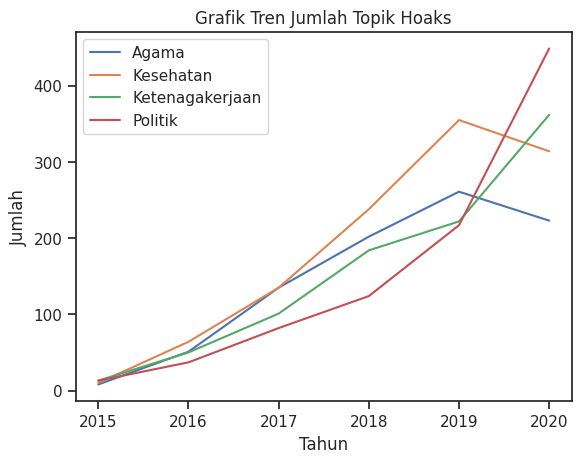

In [71]:
import datetime as dt
fig, ax = plt.subplots()

for key, data in df_topik.groupby('topik2'):
    data.plot(x = 'tahun', y = 'count', ax = ax, label = key)
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.title('Grafik Tren Jumlah Topik Hoaks')

Terlihat bahwa setelah tahun 2019, topik-topik yang berkaitan dengan politik yang berupa hoaks meningkat drastis. Hal tersebut diduga karena Pemilu tahun 2019, di mana terdapat kemungkinan kedua belah pendukung pasangan calon presiden saling menyebarkan informasi yang tidak valid.

# **Laporan Analisis Data**

## Model Klasifikasi

**Model klasifikasi terbaik** untuk mengklasifikasikan apakah suatu dokumen merupakan hoaks atau tidak pada data *hoax* dari https://www.mafindo.or.id/ yaitu **XGBoost dengan akurasi sebesar 84.96%**.

## Insight 1

In [73]:
ins1 = df_topik.groupby(["topik2"], as_index = False)["count"].sum()
ins1["percentage"] = ins1["count"]*100/sum(ins1["count"])
ins1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topik2,count,percentage
0,Agama,880,22.857143
1,Kesehatan,1116,28.987013
2,Ketenagakerjaan,932,24.207792
3,Politik,922,23.948052


Berdasarkan hasil analisis data sebelumnya, didapatkan bahwa **topik yang dibicarakan pada data terbagi menjadi 4 topik umum** yaitu topik **politik, ketenagakerjaan, kesehatan, dan agama**. Topik yang merupakan hoaks **didominasi oleh topik kesehatan** di mana terdapat **sebanyak 28.987013%** dari total keseluruhan dokumen yang merupakan hoaks.

## Insight 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDe

Text(0.5, 1.0, 'Grafik Tren Jumlah Topik Hoaks')

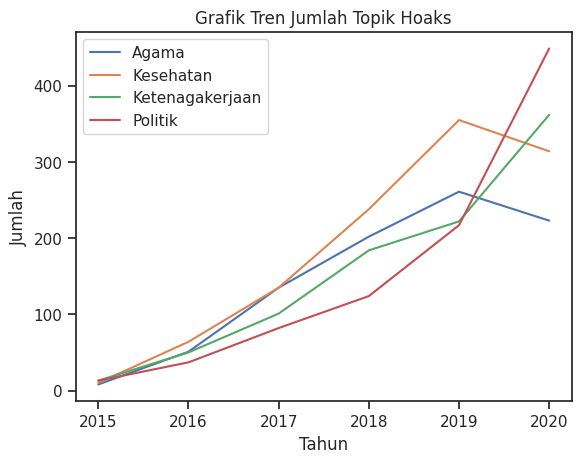

In [74]:
fig, ax = plt.subplots()

for key, data in df_topik.groupby('topik2'):
    data.plot(x = 'tahun', y = 'count', ax = ax, label = key)
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.title('Grafik Tren Jumlah Topik Hoaks')

**Topik hoaks politik mengalami kenaikan drastis setelah tahun 2019** di mana diduga hal tersebut diduga karena adanya Pemilu pada tahun 2019 silam. Topik hoaks pemilu diduga diakibatkan oleh kedua belah pendukung pasangan calon presiden yang saling menyebarkan informasi yang tidak valid.